In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
import jieba

from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

## 情感词云

In [3]:
df = pd.read_csv('../../clean_data/comments_study.csv')

/var/folders/p9/cl5b6dld6ss75rd9r5_0snd80000gn/T/ipykernel_28213/1827675484.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../clean_data/comments_study.csv')


In [4]:
def single_color_func(word=None, font_size=None, position=None, orientation=None,
                      font_path=None, random_state=None, color=None):
    return color
    
def create_word_cloud(words, type, color, size, max_font_size):
    def custom_color_func(word=None, font_size=None, position=None, orientation=None,
                          font_path=None, random_state=None):
        return single_color_func(word, font_size, position, orientation, font_path, random_state, color=color)
        
    wc = WordCloud(font_path="/System/Library/fonts/PingFang.ttc",
                   collocations=False,
                   background_color='#ffffff',
                   color_func=custom_color_func,
                   scale=4,
                   width=size[0],
                   height=size[1],
                   max_font_size = max_font_size,
                   random_state=2024,
                  ).generate(" ".join(words))
    plt.imshow(wc)  
    plt.axis('off')
    plt.savefig('results/' + type + '.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()


def tokenize(text):
    words = jieba.lcut(text)
    stop_words = set([' ', '的', '了', '和', '是', '在', '就', '不', '还', '把',
                      '我', '你', '我们', '着', '有', '啊', '呢', '让', '去', '陪', '哈哈哈',
                      '来', '啦', '就是', '吧', '它', '回', '大', '小', '上', '说', '打',
                      '他', '会', '想', '走', '到', '人', '要', '跟', '被', '没有',
                      '也', '都', '这', '那', '而', '与', '于', '哦', '，', '[', 
                      ']', '！', '。', '…', '？', '吗', '“', '”'])
    return [word for word in words if word.strip() and word not in stop_words]

    
def show_word_cloud(df, type, color='#398A1D', size=(800, 140), max_font_size=80):
    df = df.drop_duplicates(subset=['city', 'user_content']).copy()
    df['user_content'] = df['user_content'].apply(lambda x: re.sub(r'[^\w]', '', x))
    texts = ' '.join(df['user_content'].tolist())
    tokenized_words = tokenize(texts)

    create_word_cloud(tokenized_words, type, color, size, max_font_size)
    print(Counter(tokenized_words).most_common(50))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/p9/cl5b6dld6ss75rd9r5_0snd80000gn/T/jieba.cache
Loading model cost 0.989 seconds.
Prefix dict has been built successfully.


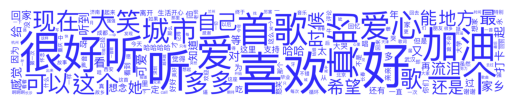

[('好', 9867), ('喜欢', 8396), ('听', 8217), ('很', 7938), ('好听', 6662), ('爱', 5637), ('加油', 5460), ('首歌', 5077), ('一个', 4987), ('真的', 4622), ('爱心', 4290), ('城市', 3530), ('多多', 3164), ('大笑', 3003), ('现在', 2925), ('这个', 2883), ('可以', 2752), ('歌', 2747), ('自己', 2658), ('地方', 2658), ('时候', 2574), ('希望', 2559), ('最', 2550), ('能', 2526), ('还是', 2506), ('流泪', 2458), ('她', 2445), ('家乡', 2407), ('可爱', 2375), ('感觉', 2353), ('一起', 2273), ('给', 2214), ('又', 2189), ('听到', 2176), ('看', 2155), ('对', 2154), ('哈哈', 2133), ('打卡', 2103), ('回家', 2092), ('知道', 2062), ('等', 2060), ('想念', 2059), ('太', 1984), ('再', 1955), ('年', 1937), ('多', 1906), ('过', 1884), ('一定', 1866), ('因为', 1857), ('支持', 1839)]


In [5]:
show_word_cloud(df[df.label=='Positive'], '积极情绪', color='#312AFA')

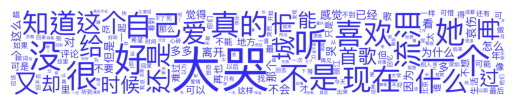

[('大哭', 3122), ('一个', 1260), ('听', 1227), ('好', 1221), ('没', 1132), ('很', 1069), ('她', 927), ('不是', 896), ('真的', 862), ('喜欢', 848), ('现在', 846), ('流泪', 829), ('自己', 828), ('知道', 736), ('什么', 702), ('又', 678), ('还是', 666), ('爱', 659), ('这个', 637), ('给', 601), ('城市', 593), ('再', 572), ('时候', 549), ('过', 542), ('首歌', 534), ('却', 525), ('能', 518), ('为什么', 503), ('离开', 492), ('对', 490), ('哭', 489), ('已经', 480), ('不会', 478), ('感觉', 478), ('多多', 478), ('多', 459), ('怎么', 458), ('这么', 457), ('看', 446), ('因为', 437), ('哀伤', 423), ('个', 419), ('但是', 415), ('那个', 411), ('觉得', 400), ('不要', 394), ('可以', 393), ('再也', 392), ('地方', 390), ('评论', 390)]


In [6]:
show_word_cloud(df[df.label=='Negative'], '消极情绪', color='#312AFA')